In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('fake_job_postings.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

Data cleaning

In [5]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
df.drop(['job_id','department','salary_range'],axis=1,inplace=True)

In [7]:
df.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [8]:
df['job_description']=df['title']+' '+df['location']+' '+df['company_profile']+' '+df['description']+df['requirements']+''+df['benefits']+''+df['required_experience']+''+df['required_education']+''+df['industry']+''+df['function']

In [9]:
df.drop(['title','location','company_profile','description','requirements','benefits','required_experience','required_education','industry','function','employment_type'],axis=1,inplace=True)

EDA

In [10]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [11]:
pip install matplotlib



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


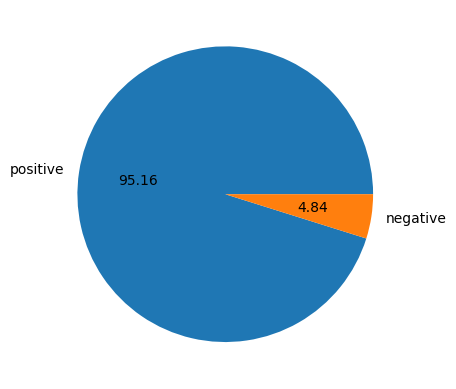

In [12]:
import matplotlib.pyplot as plt
plt.pie(df['fraudulent'].value_counts(),labels=['positive','negative'],autopct='%0.2f')
plt.show()

In [13]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['job_description'] = df['job_description'].fillna('')

<AxesSubplot:>

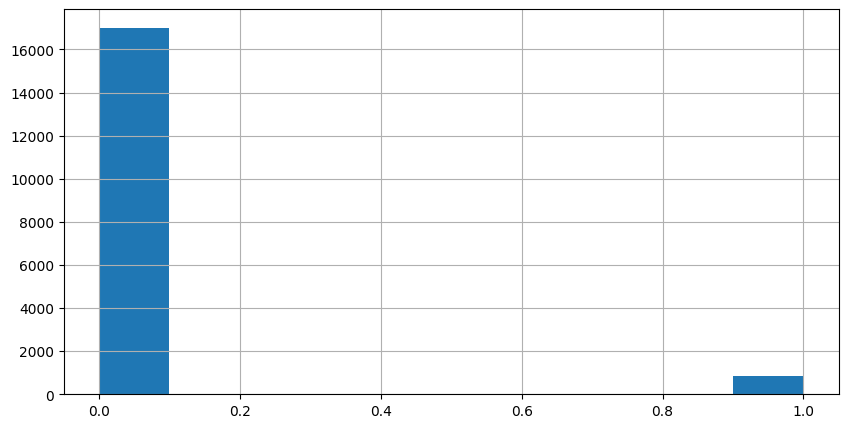

In [17]:
df['fraudulent'].hist(figsize=(10,5))

In [18]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import seaborn as sns

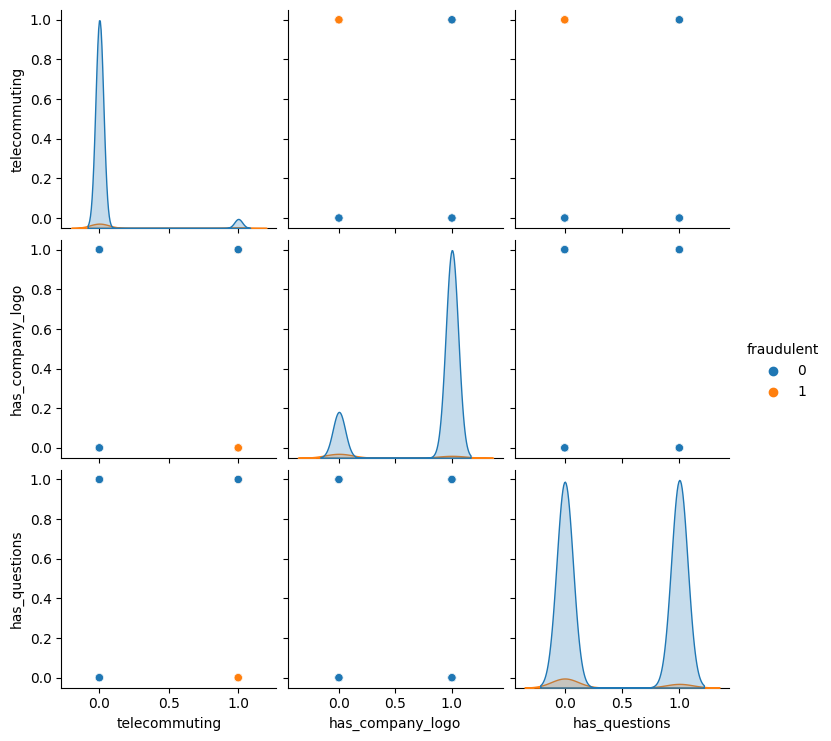

In [20]:
sns.pairplot(df,hue='fraudulent')

<AxesSubplot:>

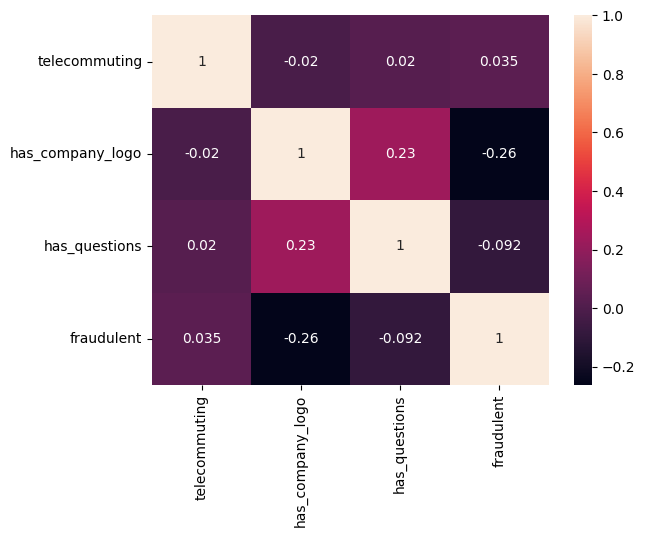

In [21]:
sns.heatmap(df.corr(),annot=True)

In [22]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apoor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords

In [24]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [25]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text  = y[:]  # cloning
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [26]:
df['transformed_text'] = df['job_description'].apply(transform_text)

In [27]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,job_description,transformed_text
0,0,1,0,0,,
1,0,1,0,0,,
2,0,1,0,0,,
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash...",account execut washington dc us dc washington ...
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotSou...",bill review manag us fl fort worth spotsourc s...


In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from wordcloud import WordCloud

In [30]:
wc = WordCloud(width=600,height=600,min_font_size=20,background_color='black')

In [31]:
positive_wc = wc.generate(df[df['fraudulent']==0]['transformed_text'].str.cat(sep=" "))

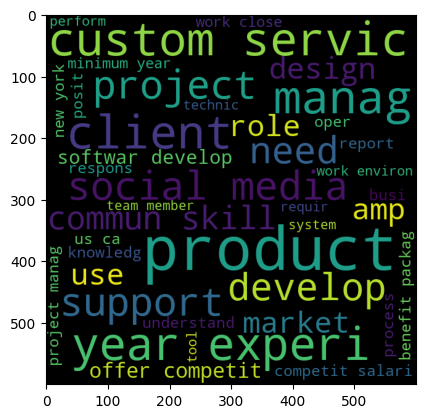

In [32]:
plt.imshow(positive_wc)

In [33]:
negative_wc = wc.generate(df[df['fraudulent']==1]['transformed_text'].str.cat(sep=" "))

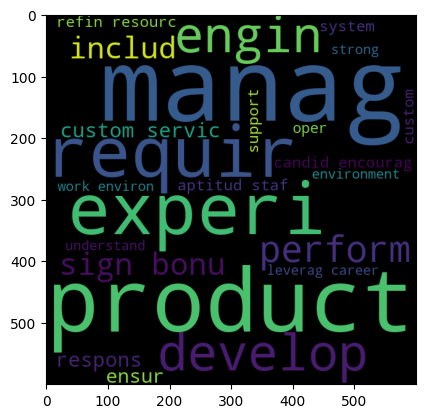

In [34]:
plt.imshow(negative_wc)

In [35]:
# finding the top 30 words of negative and positive
from collections import Counter

In [36]:
positive_corpus=[]

for msg in df[df['fraudulent']==0]['transformed_text'].tolist():
  for word in msg.split():
    positive_corpus.append(word)

len(positive_corpus)

1197900

In [37]:
Counter(positive_corpus).most_common(30)

[('work', 14746),
 ('team', 10524),
 ('experi', 10209),
 ('develop', 9952),
 ('manag', 9336),
 ('compani', 9151),
 ('servic', 8148),
 ('busi', 7333),
 ('custom', 7017),
 ('product', 6989),
 ('market', 6259),
 ('technolog', 5848),
 ('us', 5779),
 ('new', 5693),
 ('sale', 5687),
 ('client', 5573),
 ('includ', 5498),
 ('provid', 5481),
 ('commun', 5444),
 ('design', 5301),
 ('year', 5260),
 ('skill', 4616),
 ('amp', 4419),
 ('opportun', 4383),
 ('peopl', 4251),
 ('look', 3979),
 ('offer', 3902),
 ('help', 3833),
 ('time', 3738),
 ('grow', 3713)]

In [38]:
negative_corpus=[]
for msg in df[df['fraudulent']==1]['transformed_text'].tolist():
  for word in msg.split():
    negative_corpus.append(word)

len(negative_corpus)

42959

In [39]:
Counter(negative_corpus).most_common(30)

[('work', 496),
 ('product', 471),
 ('manag', 426),
 ('servic', 404),
 ('custom', 354),
 ('experi', 344),
 ('compani', 308),
 ('develop', 306),
 ('team', 292),
 ('engin', 268),
 ('provid', 259),
 ('candid', 246),
 ('commun', 244),
 ('us', 229),
 ('new', 221),
 ('help', 221),
 ('client', 215),
 ('skill', 214),
 ('test', 208),
 ('year', 207),
 ('employe', 205),
 ('project', 202),
 ('includ', 198),
 ('technolog', 193),
 ('busi', 187),
 ('amp', 185),
 ('respons', 172),
 ('recruit', 170),
 ('process', 165),
 ('requir', 162)]

Model building

In [40]:
# we will check count vectorizer and tfdf vectorizer

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [42]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [43]:
X.shape

(17880, 36740)

In [44]:
Y = df['fraudulent'].values

In [45]:
Y.shape

(17880,)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=2,test_size=.2)

In [48]:
x_train.shape

(14304, 36740)

In [49]:
x_test.shape

(3576, 36740)

In [50]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
bnb=BernoulliNB()
gnb=GaussianNB()
mnb=MultinomialNB()

In [51]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [52]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [53]:
y1=bnb.predict(x_test)

In [54]:
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1,average='micro'))
print(confusion_matrix(y_test,y1))

0.9532997762863534
0.9532997762863534
[[3381   21]
 [ 146   28]]


In [55]:
gnb.fit(x_train,y_train)

GaussianNB()

In [56]:
y1=gnb.predict(x_test)

In [57]:
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1,average='micro'))
print(confusion_matrix(y_test,y1))

0.28439597315436244
0.28439597315436244
[[ 849 2553]
 [   6  168]]


In [58]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [59]:
y1=mnb.predict(x_test)

In [60]:
print(accuracy_score(y_test,y1))
print(precision_score(y_test,y1,average='micro'))
print(confusion_matrix(y_test,y1))

0.9569351230425056
0.9569351230425056
[[3402    0]
 [ 154   20]]


In [61]:
pip install xgboost


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(max_depth=3, subsample=0.8, colsample_bytree=0.8)

In [64]:
# making dictionary of these objects
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [65]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
  clf.fit(x_train,y_train)
  y1 = clf.predict(x_test)
  accuracy=accuracy_score(y_test,y1)
  precision = precision_score(y_test,y1,average='weighted')

  return accuracy,precision

In [66]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,x_train,x_test,y_train,y_test)

  print('for',name)
  print('accuracy',current_accuracy)
  print('precision',current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for SVC
accuracy 0.9454697986577181
precision 0.9047786933990315
for KN
accuracy 0.9577740492170023
precision 0.9578674501369308
for NB
accuracy 0.9569351230425056
precision 0.9588001373989326
for DT
accuracy 0.9566554809843401
precision 0.9585442637921634
for LR
accuracy 0.9583333333333334
precision 0.9572173667888356
for RF
accuracy 0.9583333333333334
precision 0.9600816671360181
for AdaBoost
accuracy 0.9580536912751678
precision 0.9568404978268177
for BgC
accuracy 0.9586129753914989
precision 0.9603384062765856
for ETC
accuracy 0.9588926174496645
precision 0.9605952900996783
for GBDT
accuracy 0.9580536912751678
precision 0.9598250725557773
for xgb
accuracy 0.9586129753914989
precision 0.9603384062765856


In [67]:
# converting the above result into dataframe
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [68]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.958893,0.960595
7,BgC,0.958613,0.960338
10,xgb,0.958613,0.960338
5,RF,0.958333,0.960082
9,GBDT,0.958054,0.959825
2,NB,0.956935,0.958800
3,DT,0.956655,0.958544
1,KN,0.957774,0.957867
4,LR,0.958333,0.957217
6,AdaBoost,0.958054,0.956840
